In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [28]:
%matplotlib inline

import sys
#sys.path.append('/storage2/andrey/code/vrAnalysis/')
sys.path.append('/home/sobolev/storage2/andrey/code/vrAnalysis/')

import os
import h5py
#import nbimporter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib.pyplot import figure
import matplotlib.patches as patches
from scipy import stats as scipystats
from scipy import signal, interpolate
from mpl_toolkits.axes_grid1 import make_axes_locatable


from analysis.plots.utils import get_colors
from analysis.processing.utils import get_sessions_list, create_symlinks, get_params_from_json
from analysis.processing.metrics import get_fields_between_epochs, get_field_pairs, get_lonely_fields
from analysis.adapters.hdf5 import H5NAMES
from analysis.processing.epochs import get_epochs
from analysis.plots.utils import get_figure_size, get_extent

In [29]:
def draw_VR_objects(axes, y_shift=0, color='black'):
    # tall bars in the middle
    for x in np.array([-0.37, -0.18, -0.03]):
        rect = patches.Rectangle((x, -0.05 - y_shift), 0.12, 0.12, linewidth=1.2, ls='--', edgecolor=color, facecolor='none')
        axes.add_patch(rect)
        
    # virtual wall on the north
    axes.axhline(0.8 - y_shift, linewidth=1.2, ls='--', color=color)
    
    # maybe torus too?

In [81]:
# ---------------- Figure 1 - pSHIFT -----------

figsize    = (3.3, 3.5)
titles     = ['A - Original', 'B - Shifted']
conds_disp = {'A': 'A', 'B': 'B'}
y_shift    = 0.3
filename   = '1f_1.pdf'

# conjunctive
fname = '003908_2020-06-23_16-43-19_6_6' #  this one
# 00908_2019-07-11_13-06-27_3_8
# 00098_2019-07-09_17-00-25_6_5
# 003908_2020-05-04_22-29-15_3_3
# 003908_2020-06-29_16-58-24_6_2

# visual
# 003281_2019-11-21_22-51-03_4_3
# 003281_2019-10-21_22-25-20_2_7
# 003282_2019-11-26_09-48-18_4_8
# 003282_2019-11-29_14-16-57_4_2
# 003908_2020-05-04_22-29-15_3_9  this one

# boundary
# 005363_2020-10-17_14-07-46_4_6  this one
# 005363_2020-10-17_14-07-46_4_5
# 003909_2020-03-27_18-41-37_6_8
# 003908_2020-03-24_21-57-00_8_5
# 003282_2019-12-02_17-51-29_5_12
# 003282_2019-11-29_14-16-57_5_7
# 003282_2019-11-27_17-12-57_7_9

# multisensory
# 005363_2020-10-17_14-07-46_4_4  this one

In [74]:
# ---------------- Figure 2 - pSHIFT - remapping -----------

figsize    = (5, 3.5)
titles     = ['A - Original', 'B - Shifted', 'D - Dark']
conds_disp = {'A': 'A', 'B': 'B', 'D': 'Ad'}
y_shift    = 0
filename   = '2b_1.pdf'

# regular hybrid
# 003281_2019-11-21_13-44-47_2_2
# 003281_2019-11-21_13-44-47_4_2

# rate remapping
# 003908_2020-07-01_13-56-13_5_4
fname = '003908_2020-07-02_10-59-57_7_4' #  this one
# 003282_2019-11-20_15-58-39_7_12
# 005363_2020-10-16_13-45-47_4_2

# stop firing
# 003908_2020-06-17_20-23-47_3_9   ## WARNING! session is corrupt?
# 005364_2020-10-13_10-21-47_8_10  ## WARNING! session is corrupt?
# 005364_2020-10-13_10-21-47_8_9   ## WARNING! session is corrupt?
# 003908_2020-07-02_10-59-57_6_7  this one
# 003282_2019-11-21_09-44-05_4_5
# 003282_2019-11-21_09-44-05_7_2
# 003282_2019-11-24_20-06-11_4_2
# 003282_2019-12-02_17-51-29_5_8
# 003282_2019-12-02_17-51-29_6_4

# full-remapping
# 003908_2020-07-02_16-33-21_6_10
# 003282_2019-11-21_09-44-05_3_6  this one
# 003281_2019-11-21_22-51-03_4_3

In [19]:
# ---------------- Figure 3 - vSHIFT ----------

figsize    = (5, 3.5)
titles     = ['A - Original', 'B - Shifted', 'D - Dark']
conds_disp = {'A': 'A', 'B': 'B', 'D': 'D'}
y_shift    = 0
filename   = '3c_1.pdf'

fname = '005363_2020-10-26_21-37-07_2_2' # - multisensory  this one
# 005363_2020-10-26_21-37-07_2_9 - multisensory  this one
# 005363_2020-10-29_11-31-56_2_8 - multisensory

In [64]:
# ---------------- Figure 4 - vGAIN ----------

figsize    = (6, 3.5)
titles     = ['A - Original', 'B - Gain', 'C - Shifted', 'D - Dark']
conds_disp = {'A': 'A', 'B': 'B', 'C': 'C', 'D': 'D'}
y_shift    = 0
filename   = '4b_1.pdf'

fname = '005363_2020-10-13_21-28-55_2_6' #  (1.2x)
# 005363_2020-10-28_12-43-54_2_9  (1.4x)

# multimodal
# 005363_2020-10-28_09-34-17_2_13

# RATE REMAPPING for Gain 1.4x - visual cells should rate remap a lot!

# full remapping in GAIN or after GAIN in large condition
# 003282_2019-11-20_11-41-38_7_11
# 005363_2020-10-28_12-43-54_2_7
# 005363_2020-12-07_15-09-06_5_2
# 005364_2020-10-09_16-02-59_5_8
# 005364_2020-10-12_21-34-14_5_8

In [82]:
# read maps
COLORS = get_colors()
source = '/home/sobolev/storage2/andrey/data/processed'

animal, s1, s2, electrode, unit = fname.split('_')
session = '%s_%s' % (s1, s2)

sessionpath = os.path.join(source, animal, session)
conditions = get_epochs(sessionpath)
h5file = os.path.join(sessionpath, 'all.h5')

if 'Bd' in conditions:
    del conditions['Bd']
#if 'Ad' in conditions:
#    conditions['D'] = conditions.pop('Ad')

rate_maps = {}
PFRs = {}
with h5py.File(h5file, 'r') as f:
    for cond in conditions:
        grp = f['units']['%s_%s' % (electrode, unit)][cond]
        f_map = np.array(grp['04_firing_rate_map'])
        f_clu = np.array(grp[H5NAMES.field_clusters])
        
        rate_maps[cond] = f_map
        PFRs[cond] = f_clu[:, 3].max()

In [83]:
PFRs

{'A': 7.644, 'B': 6.092, 'Ad': 8.441}

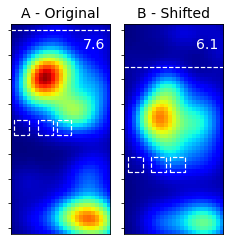

In [91]:
fig = figure(figsize=figsize)

extent = (-0.4, 0.4, -0.85, 0.85)
limits = (extent[0] - 0.1, extent[1] + 0.1, extent[2] - 0.1, extent[3] + 0.1)
limits = (extent[0], extent[1], extent[2], extent[3])
    
vmax = np.array([x.max() for x in rate_maps.values()]).max()
for i, cond in enumerate(conds_disp):
    ax = fig.add_subplot(1, len(conds_disp), i+1)
    ax.set_xticks([])
    
    ax.set_yticklabels([])
    ax.set_xlim(limits[0], limits[1])
    ax.set_ylim(limits[2], limits[3])
    #ax.yaxis.grid(linestyle='--', linewidth=1, color='black')
    ax.set_title(titles[i], fontsize=14)
    
    # peak firing rate
    ax.text(0.18, 0.65, '%.1f' % PFRs[conds_disp[cond]], fontsize=14, color='white')

    #for hline in hlines:
    #    ax.axhline(hline, color=COLORS['a'], ls='--')
    #ax.axhspan(-0.3, 0.3, alpha=0.1, color=COLORS['a'])

    f_map = rate_maps[conds_disp[cond]].T
    if y_shift > 0:
        if cond.find('A'):
            f_map = rate_maps[conds_disp[cond]][:, 10:].T
        else:
            f_map = rate_maps[conds_disp[cond]][:, :-10].T
    posPFA = ax.imshow(f_map,cmap='jet',  origin='lower', extent=extent, vmax=vmax)
    
    # virtual walls etc.
    draw_VR_objects(ax, y_shift=y_shift*i, color='white')
    
#cax = fig.add_axes([ax.get_position().x1 + 0.02, ax.get_position().y0, 0.01, ax.get_position().height])
#plt.colorbar(posPFA, cax=cax)

fig.tight_layout()
#fig.savefig(os.path.join(os.path.join(paper), filename))